#D·ª∞ ƒêO√ÅN GI√Å C·ªî PHI·∫æU B·∫∞NG THU·∫¨T TO√ÅN RANDOM FOREST

In [ ]:
!pip install mplfinance

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
#Thao t√°c v·ªõi d·ªØ li·ªáu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import random
import copy
import pickle
#Tr·ª±c quan h√≥a d·ªØ li·ªáu
from graphviz import Digraph
from IPython.display import display
# import mplfinance as mpf
import plotly.graph_objects as go
#L√†m vi·ªác v·ªõi model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression

1 Chu·∫©n b·ªã d·ªØ li·ªáu

1.1. T·∫£i d·ªØ li·ªáu c·ªï phi·∫øu

D·ªØ li·ªáu theo ng√†y

In [ ]:
# Danh s√°ch c√°c m√£ c·ªï phi·∫øu
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA']

dfs = {}
data_frames = []
for ticker in tickers:
  # T·∫£i d·ªØ li·ªáu
  data_frame = yf.download(ticker, start="2023-01-01", end="2024-12-31")
  # Chuy·ªÉn v·ªÅ data frame level 1
  df_flat = data_frame.stack(level=1).reset_index()
  df_flat.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']
  data_frames.append(df_flat)

# K·∫øt h·ª£p c√°c b·∫£ng
df_day = pd.concat(data_frames)
# ƒê·∫∑t l·∫°i ch·ªâ s·ªë c·ªßa DataFrame ƒë√£ ƒë∆∞·ª£c k·∫øt h·ª£p
df_day.reset_index(drop=True, inplace=True)

dfs['day'] = df_day
df_day


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-3-6e1c7d324bdf>:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_flat = data_frame.stack(level=1).reset_index()
[*********************100%***********************]  1 of 1 completed
<ipython-input-3-6e1c7d324bdf>:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_flat = data_frame.stack(level=1).reset_index()
[*********************100%***********************]  1 of 1 completed
<ipython-input-3-6e1c7d324bdf>:10: FutureWarning: The previous implementation of stack is deprecated and wi

Date Ticker        Open        High         Low       Close  \
0    2023-01-03   AAPL  123.470612  129.226052  122.582119  128.613985   
1    2023-01-04   AAPL  124.744125  127.014716  123.480495  125.267347   
2    2023-01-05   AAPL  123.421249  126.136083  123.164580  125.504267   
3    2023-01-06   AAPL  127.962418  128.623848  123.292909  124.398589   
4    2023-01-09   AAPL  128.485626  131.703947  128.228957  128.801541   
...         ...    ...         ...         ...         ...         ...   
1999 2024-12-23   TSLA  430.600006  434.510010  415.410004  431.000000   
2000 2024-12-24   TSLA  462.279999  462.779999  435.140015  435.899994   
2001 2024-12-26   TSLA  454.130005  465.329987  451.019989  465.160004   
2002 2024-12-27   TSLA  431.660004  450.000000  426.500000  449.519989   
2003 2024-12-30   TSLA  417.410004  427.000000  415.750000  419.399994   

         Volume  
0     112117500  
1      89113600  
2      80962700  
3      87754700  
4      70790800  
...         ...  
1999   72698100  
2000   59551800  
2001   76366400  
2002   82666800  
2003   64941000  

[2004 rows x 7 columns]

Theo tu·∫ßn

In [ ]:
# Danh s√°ch c√°c m√£ c·ªï phi·∫øu
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA']

data_frames = []
for ticker in tickers:
  # T·∫£i d·ªØ li·ªáu
  data_frame = yf.download(ticker, start="2016-01-01", end="2024-12-31", interval="1wk")
  # Chuy·ªÉn v·ªÅ data frame level 1
  df_flat = data_frame.stack(level=1).reset_index()
  df_flat.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']
  data_frames.append(df_flat)

# K·∫øt h·ª£p c√°c b·∫£ng
df_week = pd.concat(data_frames)
# ƒê·∫∑t l·∫°i ch·ªâ s·ªë c·ªßa DataFrame ƒë√£ ƒë∆∞·ª£c k·∫øt h·ª£p
df_week.reset_index(drop=True, inplace=True)

dfs['week'] = df_week
df_week


[*********************100%***********************]  1 of 1 completed
<ipython-input-4-03fa334ef202>:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_flat = data_frame.stack(level=1).reset_index()
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-03fa334ef202>:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_flat = data_frame.stack(level=1).reset_index()
[*********************100%***********************]  1 of 1 completed
<ipython-input-4-03fa334ef202>:9: FutureWarning: The previous implementation of stack is deprecated and will 

Date Ticker        Open        High         Low       Close  \
0    2016-01-01   AAPL   21.792263   23.916134   21.787745   23.184077   
1    2016-01-08   AAPL   22.485912   22.863240   21.631846   22.266748   
2    2016-01-15   AAPL   21.758371   22.289339   21.107653   21.735776   
3    2016-01-22   AAPL   21.259035   22.940056   20.874932   22.284819   
4    2016-01-29   AAPL   21.826153   21.993351   21.256776   21.417195   
...         ...    ...         ...         ...         ...         ...   
1875 2024-11-29   TSLA  369.489990  375.429993  334.649994  336.079987   
1876 2024-12-06   TSLA  418.100006  429.299988  370.799988  377.420013   
1877 2024-12-13   TSLA  436.170013  488.540009  415.709991  420.000000   
1878 2024-12-20   TSLA  454.130005  465.329987  415.410004  425.510010   
1879 2024-12-27   TSLA  403.839996  450.000000  402.540009  449.519989   

          Volume  
0     1091968800  
1     1181205200  
2     1029670000  
3     1526882000  
4      940612800  
...          ...  
1875   305635800  
1876   467418400  
1877   602213900  
1878   340832500  
1879   224432900  

[1880 rows x 7 columns]

Theo th√°ng

In [ ]:
# Danh s√°ch c√°c m√£ c·ªï phi·∫øu
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA']

data_frames = []
for ticker in tickers:
  # T·∫£i d·ªØ li·ªáu
  data_frame = yf.download(ticker, start="2000-01-01", end="2024-12-31", interval="1mo")
  # Chuy·ªÉn v·ªÅ data frame level 1
  df_flat = data_frame.stack(level=1).reset_index()
  df_flat.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']
  data_frames.append(df_flat)

# K·∫øt h·ª£p c√°c b·∫£ng
df_month = pd.concat(data_frames)
# ƒê·∫∑t l·∫°i ch·ªâ s·ªë c·ªßa DataFrame ƒë√£ ƒë∆∞·ª£c k·∫øt h·ª£p
df_month.reset_index(drop=True, inplace=True)

dfs['month'] = df_month
df_month


[*********************100%***********************]  1 of 1 completed
<ipython-input-5-946a4697e946>:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_flat = data_frame.stack(level=1).reset_index()
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-946a4697e946>:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_flat = data_frame.stack(level=1).reset_index()
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-946a4697e946>:9: FutureWarning: The previous implementation of stack is deprecated and will 

Date Ticker        Open        High         Low       Close  \
0    2000-01-01   AAPL    0.779530    0.912895    0.649921    0.787983   
1    2000-02-01   AAPL    0.861241    0.901157    0.728814    0.781409   
2    2000-03-01   AAPL    1.020434    1.129849    0.856544    0.890825   
3    2000-04-01   AAPL    0.932149    1.048140    0.787983    1.018085   
4    2000-05-01   AAPL    0.631138    0.948585    0.614233    0.938254   
...         ...    ...         ...         ...         ...         ...   
1015 2024-08-01   TSLA  214.110001  231.869995  182.000000  227.690002   
1016 2024-09-01   TSLA  261.630005  264.859985  209.639999  215.259995   
1017 2024-10-01   TSLA  249.850006  273.540009  212.110001  262.670013   
1018 2024-11-01   TSLA  345.160004  361.929993  238.880005  252.039993   
1019 2024-12-01   TSLA  403.839996  488.540009  348.200012  352.380005   

           Volume  
0     12555177600  
1      7319782400  
2      8698356800  
3      8662404800  
4      9807750400  
...           ...  
1015   1618373100  
1016   1611273300  
1017   1910807800  
1018   2091913900  
1019   1903365900  

[1020 rows x 7 columns]

1.2. L√†m s·∫°ch d·ªØ li·ªáu

In [ ]:
# Ki·ªÉm tra d·ªØ li·ªáu thi·∫øu
times = ['day', 'week', 'month']
for time in times:
  dfs[time].isnull().sum()
  dfs[time].dropna(inplace=True)
dfs['day']

Date Ticker        Open        High         Low       Close  \
0    2023-01-03   AAPL  123.470612  129.226052  122.582119  128.613985   
1    2023-01-04   AAPL  124.744125  127.014716  123.480495  125.267347   
2    2023-01-05   AAPL  123.421249  126.136083  123.164580  125.504267   
3    2023-01-06   AAPL  127.962418  128.623848  123.292909  124.398589   
4    2023-01-09   AAPL  128.485626  131.703947  128.228957  128.801541   
...         ...    ...         ...         ...         ...         ...   
1999 2024-12-23   TSLA  430.600006  434.510010  415.410004  431.000000   
2000 2024-12-24   TSLA  462.279999  462.779999  435.140015  435.899994   
2001 2024-12-26   TSLA  454.130005  465.329987  451.019989  465.160004   
2002 2024-12-27   TSLA  431.660004  450.000000  426.500000  449.519989   
2003 2024-12-30   TSLA  417.410004  427.000000  415.750000  419.399994   

         Volume  
0     112117500  
1      89113600  
2      80962700  
3      87754700  
4      70790800  
...         ...  
1999   72698100  
2000   59551800  
2001   76366400  
2002   82666800  
2003   64941000  

[2004 rows x 7 columns]

1.3 T·∫°o nh√£n

In [ ]:
# T·∫°o d·ªØ li·ªáu d·ª± b√°o l√† d·ªØ li·ªáu ng·∫Øn h·∫°n, trung h·∫°n, v√† d√†i h·∫°n
for time in times:
  dfs[time][f'Target_{time}'] = dfs[time]['Close'].shift(-1)
  # X√≥a d√≤ng cu·ªëi c√πng v√¨ b·ªã NaN
  dfs[time].dropna(inplace=True)
dfs['day']


Date Ticker        Open        High         Low       Close  \
0    2023-01-03   AAPL  123.470612  129.226052  122.582119  128.613985   
1    2023-01-04   AAPL  124.744125  127.014716  123.480495  125.267347   
2    2023-01-05   AAPL  123.421249  126.136083  123.164580  125.504267   
3    2023-01-06   AAPL  127.962418  128.623848  123.292909  124.398589   
4    2023-01-09   AAPL  128.485626  131.703947  128.228957  128.801541   
...         ...    ...         ...         ...         ...         ...   
1998 2024-12-20   TSLA  421.059998  447.079987  417.640015  425.510010   
1999 2024-12-23   TSLA  430.600006  434.510010  415.410004  431.000000   
2000 2024-12-24   TSLA  462.279999  462.779999  435.140015  435.899994   
2001 2024-12-26   TSLA  454.130005  465.329987  451.019989  465.160004   
2002 2024-12-27   TSLA  431.660004  450.000000  426.500000  449.519989   

         Volume  Target_day  
0     112117500  125.267347  
1      89113600  125.504267  
2      80962700  124.398589  
3      87754700  128.801541  
4      70790800  128.594267  
...         ...         ...  
1998  132216200  431.000000  
1999   72698100  435.899994  
2000   59551800  465.160004  
2001   76366400  449.519989  
2002   82666800  419.399994  

[2003 rows x 8 columns]

In [ ]:
X = {}
y = {}
features = ["Open", "High", "Low", "Close", "Volume"]
for time in times:
  X[time] = dfs[time][features]
  y[time] = dfs[time][f'Target_{time}']
  print(f'Gi√° c·ªï phi·∫øu theo {time}')
  print(X[time])
  print(y[time])


Gi√° c·ªï phi·∫øu theo day
            Open        High         Low       Close     Volume
0     123.470612  129.226052  122.582119  128.613985  112117500
1     124.744125  127.014716  123.480495  125.267347   89113600
2     123.421249  126.136083  123.164580  125.504267   80962700
3     127.962418  128.623848  123.292909  124.398589   87754700
4     128.485626  131.703947  128.228957  128.801541   70790800
...          ...         ...         ...         ...        ...
1998  421.059998  447.079987  417.640015  425.510010  132216200
1999  430.600006  434.510010  415.410004  431.000000   72698100
2000  462.279999  462.779999  435.140015  435.899994   59551800
2001  454.130005  465.329987  451.019989  465.160004   76366400
2002  431.660004  450.000000  426.500000  449.519989   82666800

[2003 rows x 5 columns]
0       125.267347
1       125.504267
2       124.398589
3       128.801541
4       128.594267
           ...    
1998    431.000000
1999    435.899994
2000    465.160004
2001    4

1.4 Chia d·ªØ li·ªáu train/test

In [ ]:
# Chia theo t·ª∑ l·ªá 80% train, 20% test, kh√¥ng shuffle
X_train = {}
X_test = {}
y_train = {}
y_test = {}
for time in times:
  X_train[time], X_test[time], y_train[time], y_test[time] = train_test_split(
      X[time], y[time], test_size=0.2, shuffle=False
  )
  print(f"S·ªë m·∫´u Train {time}:", X_train[time].shape)
  print(f"S·ªë m·∫´u Test {time}:", X_test[time].shape)


S·ªë m·∫´u Train day: (1602, 5)
S·ªë m·∫´u Test day: (401, 5)
S·ªë m·∫´u Train week: (1503, 5)
S·ªë m·∫´u Test week: (376, 5)
S·ªë m·∫´u Train month: (815, 5)
S·ªë m·∫´u Test month: (204, 5)


2. X√¢y d·ª±ng m√¥ h√¨nh

H√†m t√≠nh mse:

In [ ]:
def mse(y):
    """
    H√†m t√≠nh MSE c·ªßa 1 t·∫≠p gi√° tr·ªã y (h·ªó tr·ª£ multi-output)
    """
    mean_y = sum(y) / len(y)
    return sum((yi - mean_y) ** 2 for yi in y) / len(y)

T√¨m split t·ªët nh·∫•t trong 1 node:

√ù t∆∞·ªüng:

Duy·ªát qua t·ª´ng feature

V·ªõi m·ªói feature:

S·∫Øp x·∫øp theo gi√° tr·ªã feature ƒë√≥

Duy·ªát qua c√°c gi√° tr·ªã trung gian ƒë·ªÉ x√©t ng∆∞·ª°ng chia

V·ªõi m·ªói ng∆∞·ª°ng chia:

T√≠nh MSE(left) v√† MSE(right)

L∆∞u split n·∫øu t·ªët h∆°n (t·ªïng MSE nh·ªè h∆°n)

In [ ]:
def best_split(X, y):
    n_samples, n_features = len(X), len(X[0])
    best_mse = float('inf')
    best_feature, best_threshold = None, None

    for feature_index in range(n_features):
        feature_values = [x[feature_index] for x in X]
        sorted_data = sorted(zip(feature_values, y, X), key=lambda tup: tup[0])

        for i in range(1, n_samples):
            if sorted_data[i-1][0] == sorted_data[i][0]:
                continue
            threshold = (sorted_data[i-1][0] + sorted_data[i][0]) / 2
            y_left = [tup[1] for tup in sorted_data[:i]]
            y_right = [tup[1] for tup in sorted_data[i:]]

            mse_left = mse(y_left)
            mse_right = mse(y_right)
            total_mse = len(y_left)/n_samples * mse_left + len(y_right)/n_samples * mse_right

            if total_mse < best_mse:
                best_mse = total_mse
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold


X√¢y d·ª±ng c√¢y h·ªìi quy:
Logic ch√≠nh:
T·∫°i m·ªói node:

T√¨m split t·ªët nh·∫•t

N·∫øu kh√¥ng c√≤n g√¨ ƒë·ªÉ chia ‚Üí return gi√° tr·ªã trung b√¨nh

N·∫øu chia ƒë∆∞·ª£c ‚Üí ƒë·ªá quy sang 2 nh√°nh tr√°i/ph·∫£i

In [ ]:
class RegressionTreeNode:
    def __init__(self, depth=0, max_depth=5, min_samples_split=2):
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.left = None
        self.right = None
        self.feature_index = None
        self.threshold = None
        self.value = None

    def fit(self, X, y):
        if len(y) < self.min_samples_split or self.depth >= self.max_depth:
            self.value = sum(y) / len(y)
            return

        feature, threshold = best_split(X, y)
        if feature is None:
            self.value = sum(y) / len(y)
            return

        self.feature_index = feature
        self.threshold = threshold
        X_left, y_left, X_right, y_right = [], [], [], []

        for xi, yi in zip(X, y):
            if xi[feature] <= threshold:
                X_left.append(xi)
                y_left.append(yi)
            else:
                X_right.append(xi)
                y_right.append(yi)

        self.left = RegressionTreeNode(self.depth + 1, self.max_depth, self.min_samples_split)
        self.left.fit(X_left, y_left)
        self.right = RegressionTreeNode(self.depth + 1, self.max_depth, self.min_samples_split)
        self.right.fit(X_right, y_right)

    def predict(self, xi):
        if self.value is not None:
            return self.value
        if xi[self.feature_index] <= self.threshold:
            return self.left.predict(xi)
        else:
            return self.right.predict(xi)

T·∫°o r·ª´ng:

C√°c y·∫øu t·ªë Random:

Bootstrap sampling: l·∫•y ng·∫´u nhi√™n t·∫≠p con c·ªßa d·ªØ li·ªáu ƒë·ªÉ train m·ªói c√¢y

Feature bagging: ch·ªâ x√©t 1 ph·∫ßn c√°c feature t·∫°i m·ªói node

In [ ]:
class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=5, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def bootstrap_sample(self, X, y):
        n = len(X)
        indices = [random.randint(0, n - 1) for _ in range(n)]
        return [X[i] for i in indices], [y[i] for i in indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = RegressionTreeNode(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = []
        for xi in X:
            preds = [tree.predict(xi) for tree in self.trees]
            predictions.append(sum(preds) / len(preds))
        return predictions

Full ch∆∞∆°ng tr√¨nh:

In [ ]:
# Ham tinh MSE cho 1 danh sach y
def mse(y):
    mean_y = sum(y) / len(y)
    return sum((yi - mean_y) ** 2 for yi in y) / len(y)

# Tim best split dua tren giam MSE
def best_split(X, y):
    n_samples, n_features = len(X), len(X[0])
    best_mse = float('inf')
    best_feature, best_threshold = None, None

    for feature_index in range(n_features):
        feature_values = [x[feature_index] for x in X]
        sorted_data = sorted(zip(feature_values, y, X), key=lambda tup: tup[0])

        for i in range(1, n_samples):
            if sorted_data[i-1][0] == sorted_data[i][0]:
                continue
            threshold = (sorted_data[i-1][0] + sorted_data[i][0]) / 2
            y_left = [tup[1] for tup in sorted_data[:i]]
            y_right = [tup[1] for tup in sorted_data[i:]]

            mse_left = mse(y_left)
            mse_right = mse(y_right)
            total_mse = len(y_left)/n_samples * mse_left + len(y_right)/n_samples * mse_right

            if total_mse < best_mse:
                best_mse = total_mse
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

# Nut trong Regression Tree
class RegressionTreeNode:
    def __init__(self, depth=0, max_depth=5, min_samples_split=2):
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.left = None
        self.right = None
        self.feature_index = None
        self.threshold = None
        self.value = None

    def fit(self, X, y):
        if len(y) < self.min_samples_split or self.depth >= self.max_depth:
            self.value = sum(y) / len(y)
            return

        feature, threshold = best_split(X, y)
        if feature is None:
            self.value = sum(y) / len(y)
            return

        self.feature_index = feature
        self.threshold = threshold
        X_left, y_left, X_right, y_right = [], [], [], []

        for xi, yi in zip(X, y):
            if xi[feature] <= threshold:
                X_left.append(xi)
                y_left.append(yi)
            else:
                X_right.append(xi)
                y_right.append(yi)

        self.left = RegressionTreeNode(self.depth + 1, self.max_depth, self.min_samples_split)
        self.left.fit(X_left, y_left)
        self.right = RegressionTreeNode(self.depth + 1, self.max_depth, self.min_samples_split)
        self.right.fit(X_right, y_right)

    def predict(self, xi):
        if self.value is not None:
            return self.value
        if xi[self.feature_index] <= self.threshold:
            return self.left.predict(xi)
        else:
            return self.right.predict(xi)

# Random Forest Regressor
class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=5, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def bootstrap_sample(self, X, y):
        n = len(X)
        indices = [random.randint(0, n - 1) for _ in range(n)]
        return [X[i] for i in indices], [y[i] for i in indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = RegressionTreeNode(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = []
        for xi in X:
            preds = [tree.predict(xi) for tree in self.trees]
            predictions.append(sum(preds) / len(preds))
        return predictions

# --- Hu·∫•n luy·ªán ri√™ng t·ª´ng m√¥ h√¨nh ƒë·ªÉ d·ª± ƒëo√°n c√°c ch·ªâ s·ªë ---
models = {}
predictions = {}
times = ['day', 'week', 'month']

for time in times:
    model = RandomForestRegressor(n_estimators=10, max_depth=6)
    model.fit(X_train[time].values.tolist(), y_train[time])
    models[time] = model
    predictions[time] = model.predict(X_test[time].values.tolist())

In [ ]:
# Chuyen sang DataFrame de hien thi ket qua
predictions_df = {}
for time in times:
  predictions_df[time] = pd.DataFrame(predictions[time], columns=[f'Target_{time}'])
  print(predictions_df[time])


     Target_day
0    184.617902
1    193.200746
2    197.957200
3    198.599684
4    206.056050
..          ...
396  425.997383
397  422.940704
398  457.228367
399  450.029042
400  432.942966

[401 rows x 1 columns]
     Target_week
0      23.227809
1      21.897048
2      21.897048
3      21.897048
4      21.897048
..           ...
371   329.466027
372   366.836468
373   417.605548
374   437.050582
375   436.626095

[376 rows x 1 columns]
     Target_month
0      117.428504
1      105.976180
2       96.013761
3       92.219359
4      100.701040
..            ...
199    208.914796
200    219.483105
201    208.131700
202    203.594536
203    321.029901

[204 rows x 1 columns]


Hi·ªÉn th·ªã c√¢y

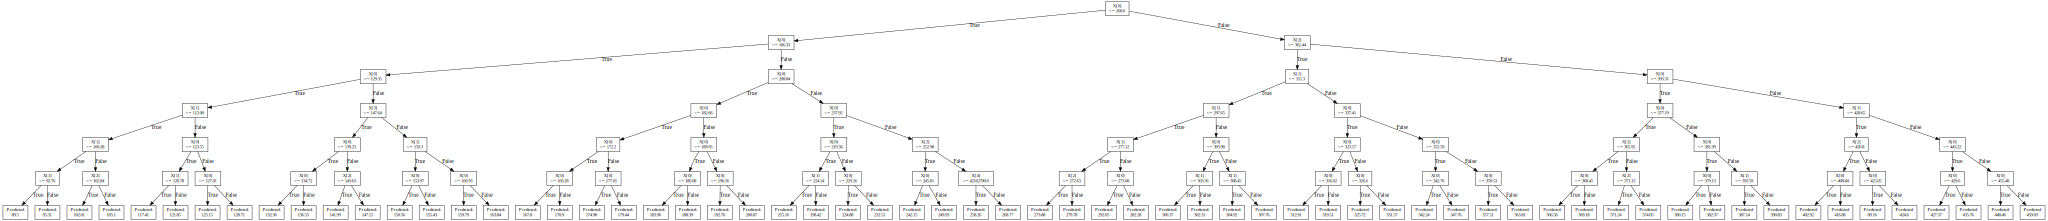

In [ ]:
def visualize_tree(node, dot=None, node_id=0):
    if dot is None:
        dot = Digraph()
        dot.attr('node', shape='box', fontsize='12')

    current_id = str(node_id)

    # G√°n nh√£n cho n√∫t
    if node.value is not None:
        label = f"Predicted:\n{round(node.value, 2)}"
    else:
        label = f"X[{node.feature_index}]\n<= {round(node.threshold, 2)}"

    dot.node(current_id, label)
    next_id = node_id + 1

    # V·∫Ω nh√°nh tr√°i
    if node.left:
        left_id = str(next_id)
        dot.edge(current_id, left_id, label="True")
        dot, next_id = visualize_tree(node.left, dot, next_id)

    # V·∫Ω nh√°nh ph·∫£i
    if node.right:
        right_id = str(next_id)
        dot.edge(current_id, right_id, label="False")
        dot, next_id = visualize_tree(node.right, dot, next_id)

    return dot, next_id

# V·∫Ω 1 c√¢yS
dot, _ = visualize_tree(models['day'].trees[0])
display(dot)

# V·∫Ω t·∫•t c·∫£ c√°c c√¢y trong Random Forest day
# for i, tree in enumerate(models['day'].trees):
#     print(f"üå≤ C√¢y s·ªë {i+1}")
#     dot, _ = visualize_tree(tree)
#     display(dot)

T√≠nh to√°n RSME ƒë·ªÉ t√¨m ra ƒë·ªô s√¢u t·ªëi ƒëa (max_depth) v√† s·ªë c√¢y trong r·ª´ng (n_estimators) t·ªëi ∆∞u

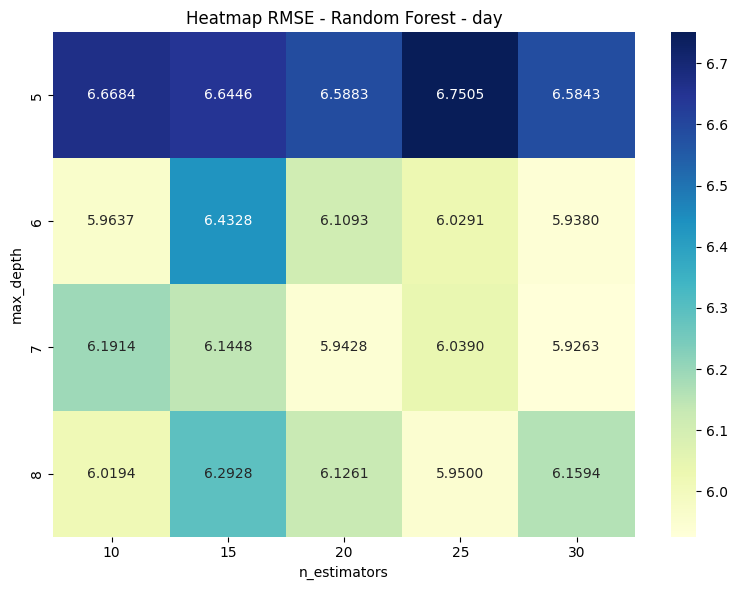

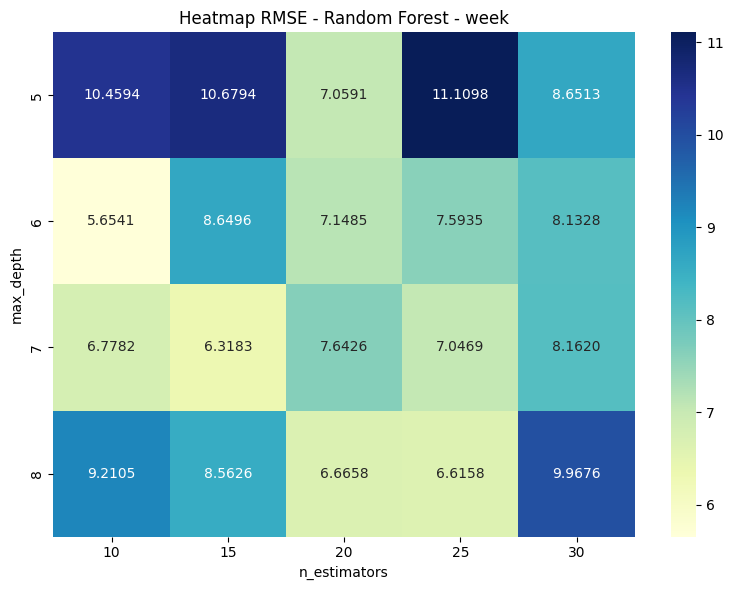

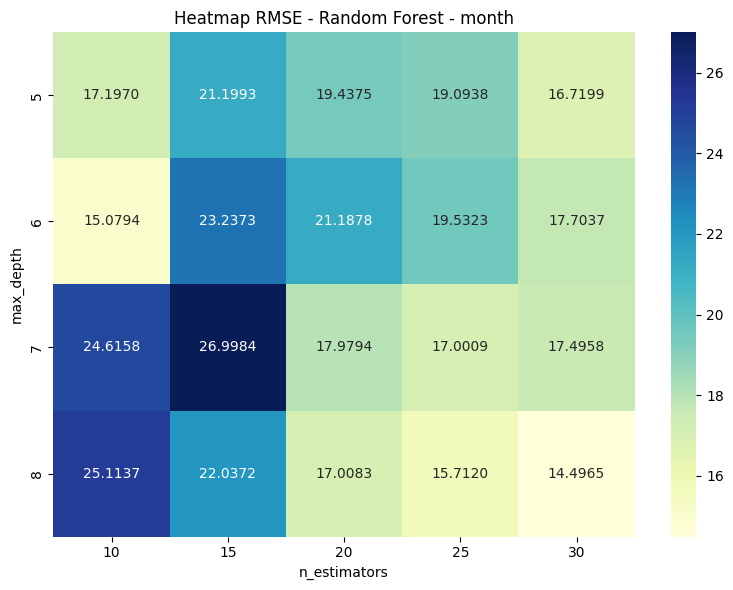

In [ ]:
max_depths = [5, 6, 7, 8]
n_estimators_list = [10, 15, 20, 25, 30]

# T·∫°o dictionary l∆∞u k·∫øt qu·∫£ RMSE cho t·ª´ng output
results_dict = {time: pd.DataFrame(index=max_depths, columns=n_estimators_list) for time in times}

# Hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh ri√™ng cho t·ª´ng output
for time in times:

    for depth in max_depths:
        for trees in n_estimators_list:
            model = RandomForestRegressor(n_estimators=trees, max_depth=depth)
            model.fit(X_train[time].values.tolist(), y_train[time])
            preds = model.predict(X_test[time].values.tolist())
            rmse = np.sqrt(mean_squared_error(y_test[time], preds))
            results_dict[time].loc[depth, trees] = round(rmse, 4)

# V·∫Ω heatmap cho t·ª´ng output
for time in times:
    plt.figure(figsize=(8, 6))
    sns.heatmap(results_dict[time].astype(float), annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"Heatmap RMSE - Random Forest - {time}")
    plt.xlabel("n_estimators")
    plt.ylabel("max_depth")
    plt.tight_layout()
    plt.show()

So s√°nh d·ªØ li·ªáu d·ªØ ƒëo√°n v·ªõi d·ªØ li·ªáu th·∫≠t

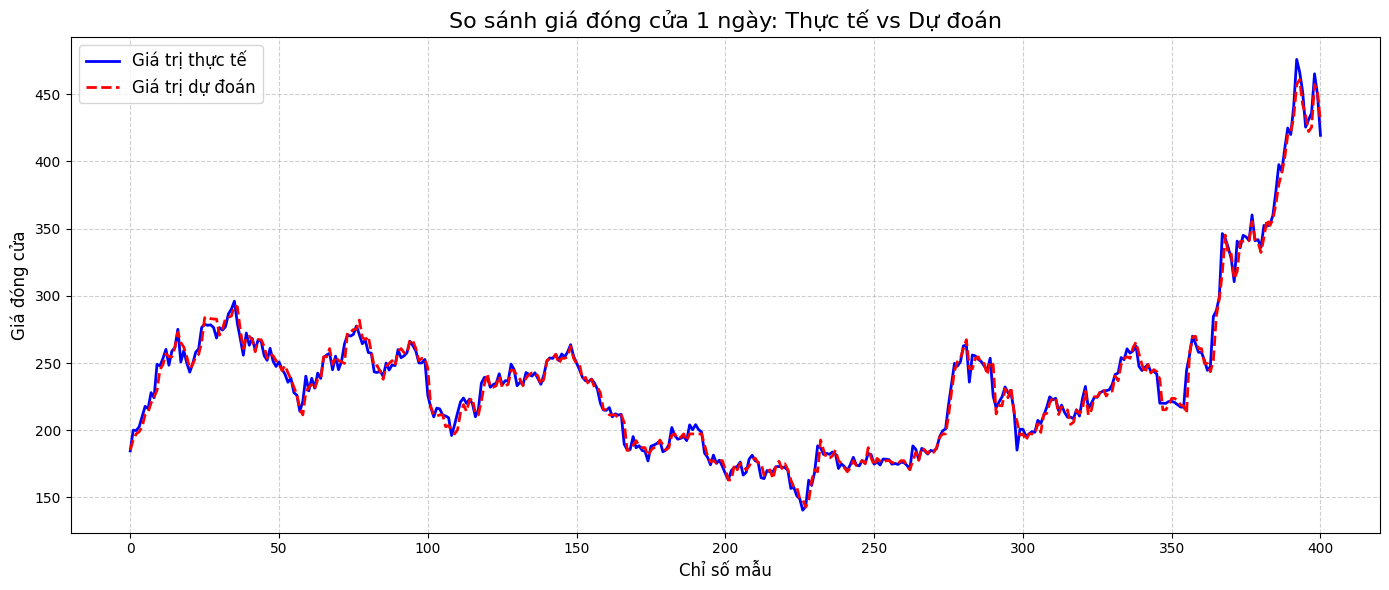

In [ ]:
# L·∫•y gi√° tr·ªã th·ª±c t·∫ø v√† d·ª± ƒëo√°n t·ª´ DataFrame
y_true = y_test['day'].values.tolist()
y_pred = predictions_df['day'].values.tolist()

# T·∫°o ch·ªâ s·ªë tr·ª•c x
x_range = list(range(len(y_true)))

# T·∫°o figure
plt.figure(figsize=(14, 6))  # üëà m·ªü r·ªông khung h√¨nh cho d·ªÖ nh√¨n

# V·∫Ω ƒë∆∞·ªùng gi√° tr·ªã th·∫≠t
plt.plot(x_range, y_true, label='Gi√° tr·ªã th·ª±c t·∫ø', color='blue', linewidth=2)

# V·∫Ω ƒë∆∞·ªùng gi√° tr·ªã d·ª± ƒëo√°n
plt.plot(x_range, y_pred, label='Gi√° tr·ªã d·ª± ƒëo√°n', color='red', linestyle='--', linewidth=2)

# Trang tr√≠ bi·ªÉu ƒë·ªì
plt.title('So s√°nh gi√° ƒë√≥ng c·ª≠a 1 ng√†y: Th·ª±c t·∫ø vs D·ª± ƒëo√°n', fontsize=16)
plt.xlabel('Ch·ªâ s·ªë m·∫´u', fontsize=12)
plt.ylabel('Gi√° ƒë√≥ng c·ª≠a', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

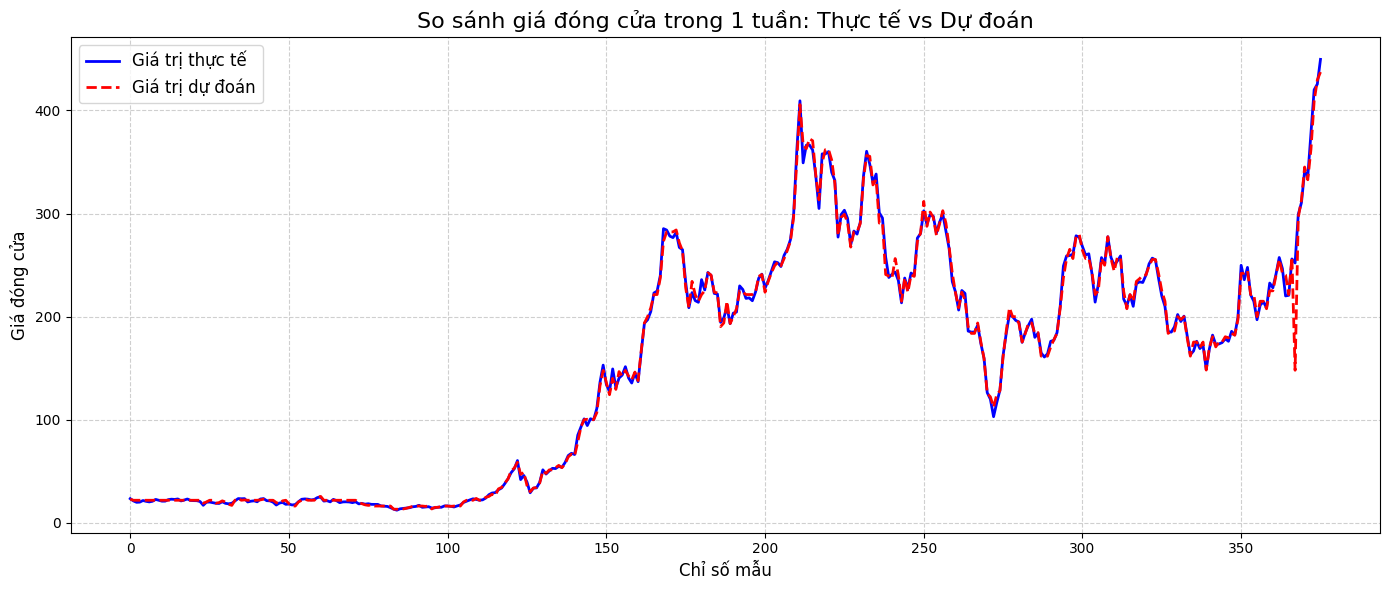

In [ ]:
# L·∫•y gi√° tr·ªã th·ª±c t·∫ø v√† d·ª± ƒëo√°n t·ª´ DataFrame
y_true = y_test['week'].values.tolist()
y_pred = predictions_df['week'].values.tolist()

# T·∫°o ch·ªâ s·ªë tr·ª•c x
x_range = list(range(len(y_true)))

# T·∫°o figure
plt.figure(figsize=(14, 6))  # üëà m·ªü r·ªông khung h√¨nh cho d·ªÖ nh√¨n

# V·∫Ω ƒë∆∞·ªùng gi√° tr·ªã th·∫≠t
plt.plot(x_range, y_true, label='Gi√° tr·ªã th·ª±c t·∫ø', color='blue', linewidth=2)

# V·∫Ω ƒë∆∞·ªùng gi√° tr·ªã d·ª± ƒëo√°n
plt.plot(x_range, y_pred, label='Gi√° tr·ªã d·ª± ƒëo√°n', color='red', linestyle='--', linewidth=2)

# Trang tr√≠ bi·ªÉu ƒë·ªì
plt.title('So s√°nh gi√° ƒë√≥ng c·ª≠a trong 1 tu·∫ßn: Th·ª±c t·∫ø vs D·ª± ƒëo√°n', fontsize=16)
plt.xlabel('Ch·ªâ s·ªë m·∫´u', fontsize=12)
plt.ylabel('Gi√° ƒë√≥ng c·ª≠a', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

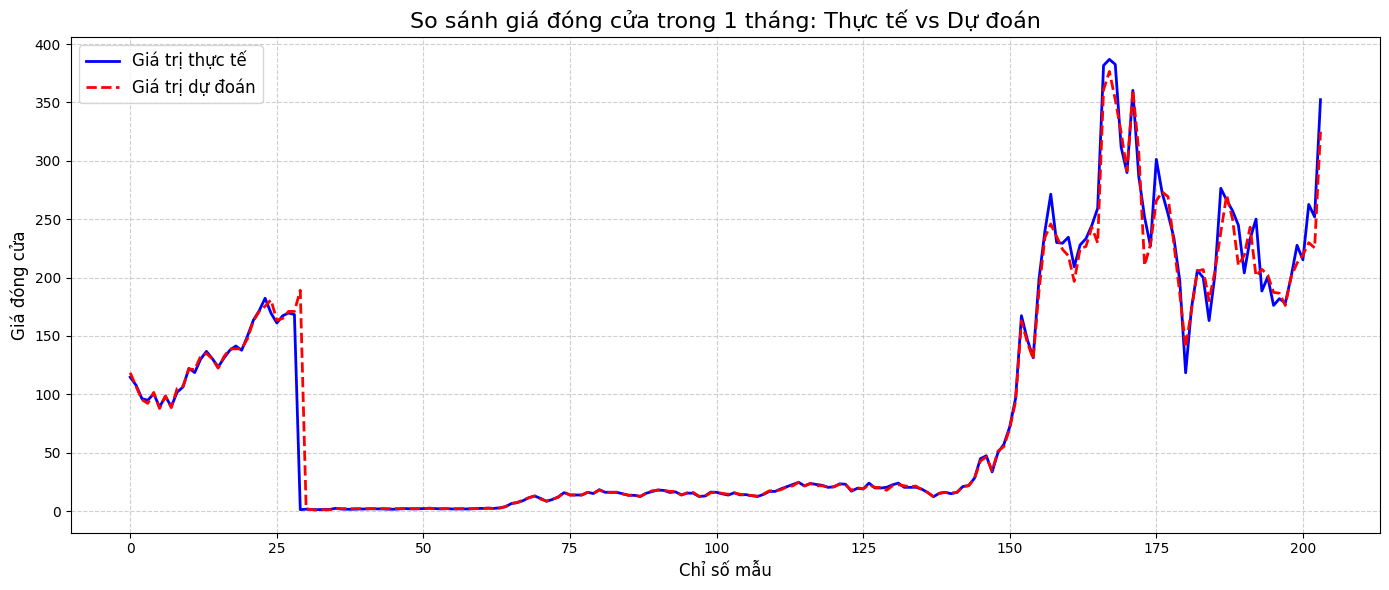

In [ ]:
# L·∫•y gi√° tr·ªã th·ª±c t·∫ø v√† d·ª± ƒëo√°n t·ª´ DataFrame
y_true = y_test['month'].values.tolist()
y_pred = predictions_df['month'].values.tolist()

# T·∫°o ch·ªâ s·ªë tr·ª•c x
x_range = list(range(len(y_true)))

# T·∫°o figure
plt.figure(figsize=(14, 6))  # üëà m·ªü r·ªông khung h√¨nh cho d·ªÖ nh√¨n

# V·∫Ω ƒë∆∞·ªùng gi√° tr·ªã th·∫≠t
plt.plot(x_range, y_true, label='Gi√° tr·ªã th·ª±c t·∫ø', color='blue', linewidth=2)

# V·∫Ω ƒë∆∞·ªùng gi√° tr·ªã d·ª± ƒëo√°n
plt.plot(x_range, y_pred, label='Gi√° tr·ªã d·ª± ƒëo√°n', color='red', linestyle='--', linewidth=2)

# Trang tr√≠ bi·ªÉu ƒë·ªì
plt.title('So s√°nh gi√° ƒë√≥ng c·ª≠a trong 1 th√°ng: Th·ª±c t·∫ø vs D·ª± ƒëo√°n', fontsize=16)
plt.xlabel('Ch·ªâ s·ªë m·∫´u', fontsize=12)
plt.ylabel('Gi√° ƒë√≥ng c·ª≠a', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

3. ƒê√°nh gi√° m√¥ h√¨nh

In [ ]:
# T√≠nh MAE
mae = mean_absolute_error(y_true, y_pred)

# T√≠nh RMSE th·ªß c√¥ng (n·∫øu kh√¥ng h·ªó tr·ª£ squared=False)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# In k·∫øt qu·∫£
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")


MAE (Mean Absolute Error): 5.5272
RMSE (Root Mean Squared Error): 18.4687


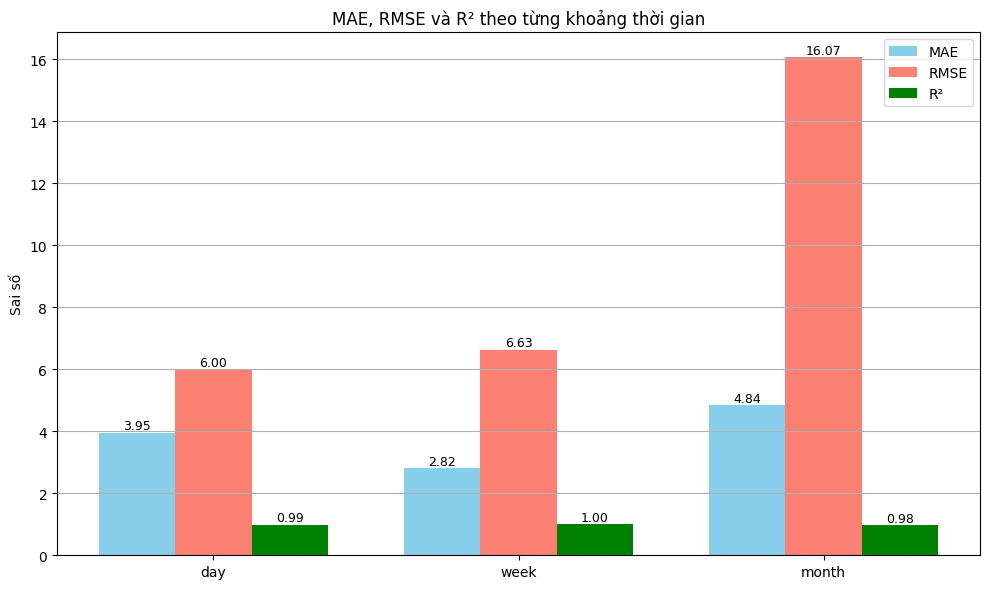

In [ ]:
maes = []
rmses = []
rs = []

for time in times:
    y_true = y_test[time].values.tolist()
    y_pred = predictions_df[time].values.tolist()
    maes.append(mean_absolute_error(y_true, y_pred))
    rmses.append(np.sqrt(mean_squared_error(y_true, y_pred)))
    rs.append(r2_score(y_true, y_pred))

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
x = np.arange(len(times))
width = 0.25

plt.figure(figsize=(10, 6))
bar1 = plt.bar(x - width, maes, width, label='MAE', color='skyblue')
bar2 = plt.bar(x, rmses, width, label='RMSE', color='salmon')
bar3 = plt.bar(x + width, rs, width, label='R¬≤', color='green')

# Th√™m s·ªë tr√™n ƒë·ªânh c·ªôt
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}',
                 ha='center', va='bottom', fontsize=9)

plt.xticks(x, times)
plt.ylabel("Sai s·ªë")
plt.title("MAE, RMSE v√† R¬≤ theo t·ª´ng kho·∫£ng th·ªùi gian")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

4. √Åp d·ª•ng m√¥ h√¨nh ƒë·ªÉ d·ª± ƒëo√°n

√Åp d·ª•ng v·ªõi NVDA

In [ ]:
nvda=yf.download("NVDA", start="2025-01-01", end="2025-04-22")
nvda_flat = nvda.stack(level=1).reset_index()
nvda_flat.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']
nvda_flat.dropna(inplace=True)
# T·∫°o d·ªØ li·ªáu d·ª± b√°o l√† d·ªØ li·ªáu c·ªßa ng√†y h√¥m sau
nvda_flat['Target_day'] = nvda_flat['Close'].shift(-1)

nvda_flat.dropna(inplace=True)
nvda_flat

[*********************100%***********************]  1 of 1 completed
<ipython-input-27-57e100b953a3>:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  nvda_flat = nvda.stack(level=1).reset_index()


Date Ticker        Open        High         Low       Close  \
0  2025-01-02   NVDA  138.297272  138.867227  134.617618  135.987487   
1  2025-01-03   NVDA  144.456711  144.886664  139.717141  139.997114   
2  2025-01-06   NVDA  149.416245  152.146004  147.806407  148.576325   
3  2025-01-07   NVDA  140.127106  153.115916  139.997113  153.015919   
4  2025-01-08   NVDA  140.097122  143.936766  137.547354  142.566896   
..        ...    ...         ...         ...         ...         ...   
68 2025-04-11   NVDA  110.930000  111.550003  107.480003  108.500000   
69 2025-04-14   NVDA  110.709999  114.290001  109.070000  114.110001   
70 2025-04-15   NVDA  112.199997  113.620003  110.500000  110.970001   
71 2025-04-16   NVDA  104.489998  106.790001  100.449997  104.550003   
72 2025-04-17   NVDA  101.489998  104.470001  100.050003  104.449997   

       Volume  Target_day  
0   198247200  139.997114  
1   229322500  148.576325  
2   265377400  153.015919  
3   351782200  142.566896  
4   227349900  137.437358  
..        ...         ...  
68  313417300  114.110001  
69  264705000  110.970001  
70  228966900  104.550003  
71  397016900  104.449997  
72  290833400   98.769997  

[73 rows x 8 columns]

In [ ]:
X_nvda_test = nvda_flat[['Open', 'High', 'Low', 'Close', 'Volume']]
y_nvda_test = nvda_flat[['Target_day']]

predictions = {}

model = models['day']
predictions['Target_day'] = model.predict(X_nvda_test.values.tolist())

# Chuyen sang DataFrame de hien thi ket qua
nvda_predict_df = pd.DataFrame(predictions)
nvda_predict_df.columns = [col for col in nvda_predict_df.columns]
nvda_predict_df

Target_day
0   137.119238
1   147.307669
2   149.139190
3   145.853970
4   142.775255
..         ...
68  109.334603
69  112.165169
70  114.344264
71  102.831026
72  102.831026

[73 rows x 1 columns]

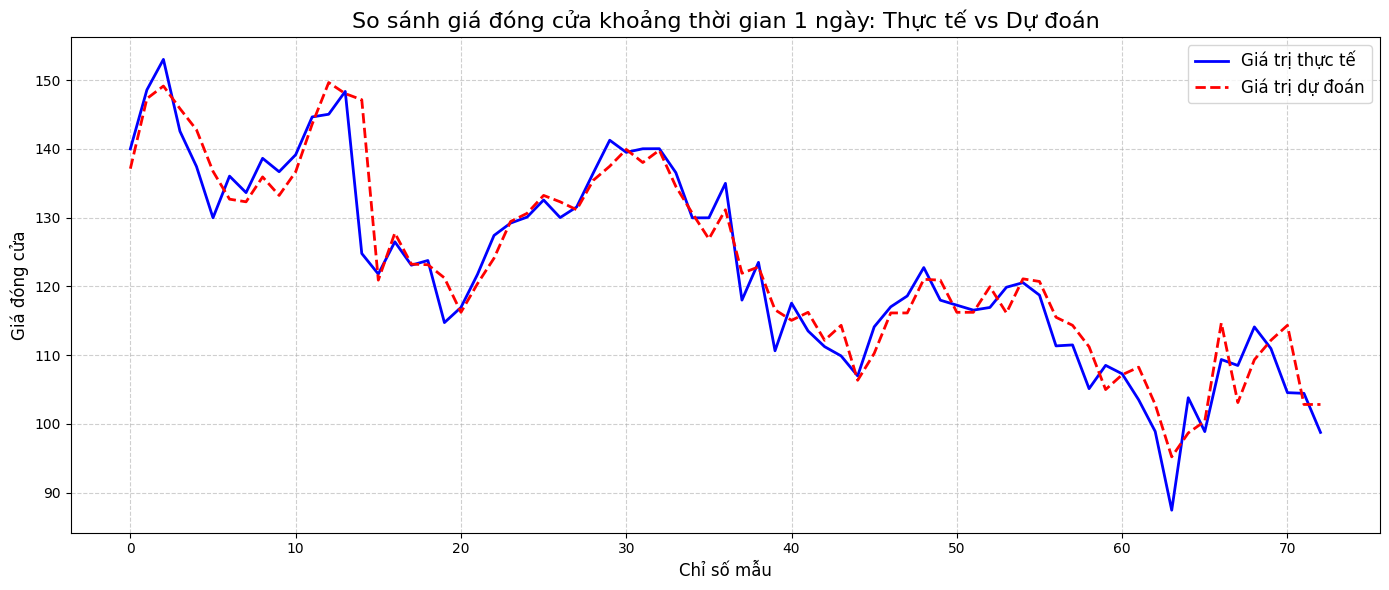

In [ ]:
# L·∫•y gi√° tr·ªã th·ª±c t·∫ø v√† d·ª± ƒëo√°n t·ª´ DataFrame
y_nvda_true = y_nvda_test['Target_day'].values.tolist()
y_nvda_pred = nvda_predict_df['Target_day'].values.tolist()

# T·∫°o ch·ªâ s·ªë tr·ª•c x
x_range = list(range(len(y_nvda_true)))

# T·∫°o figure
plt.figure(figsize=(14, 6))  # üëà m·ªü r·ªông khung h√¨nh cho d·ªÖ nh√¨n

# V·∫Ω ƒë∆∞·ªùng gi√° tr·ªã th·∫≠t
plt.plot(x_range, y_nvda_true, label='Gi√° tr·ªã th·ª±c t·∫ø', color='blue', linewidth=2)

# V·∫Ω ƒë∆∞·ªùng gi√° tr·ªã d·ª± ƒëo√°n
plt.plot(x_range, y_nvda_pred, label='Gi√° tr·ªã d·ª± ƒëo√°n', color='red', linestyle='--', linewidth=2)

# Trang tr√≠ bi·ªÉu ƒë·ªì
plt.title('So s√°nh gi√° ƒë√≥ng c·ª≠a kho·∫£ng th·ªùi gian 1 ng√†y: Th·ª±c t·∫ø vs D·ª± ƒëo√°n', fontsize=16)
plt.xlabel('Ch·ªâ s·ªë m·∫´u', fontsize=12)
plt.ylabel('Gi√° ƒë√≥ng c·ª≠a', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

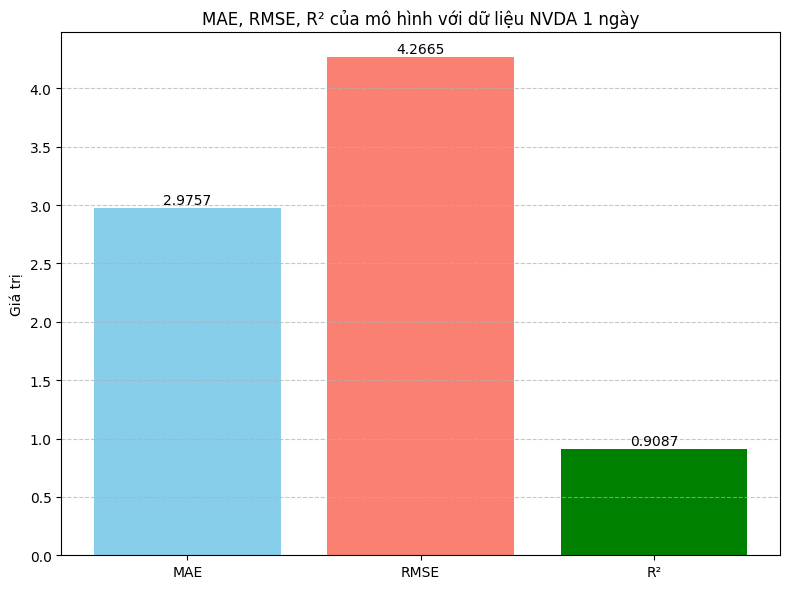

In [ ]:
# D·ªØ li·ªáu
metrics = ['MAE', 'RMSE', 'R¬≤']
values = [maes, rmses, rs]

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'salmon', 'green'])

# Th√™m s·ªë tr√™n ƒë·ªânh c·ªôt
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.title("MAE, RMSE, R¬≤ c·ªßa m√¥ h√¨nh v·ªõi d·ªØ li·ªáu NVDA 1 ng√†y")
plt.ylabel("Gi√° tr·ªã")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

5. So s√°nh Random Forest v·ªõi m√¥ h√¨nh kh√°c

Linear Regression - MAE: 8.1384
Linear Regression - RMSE: 17.8874
Linear Regression - R¬≤ Score: 0.9693


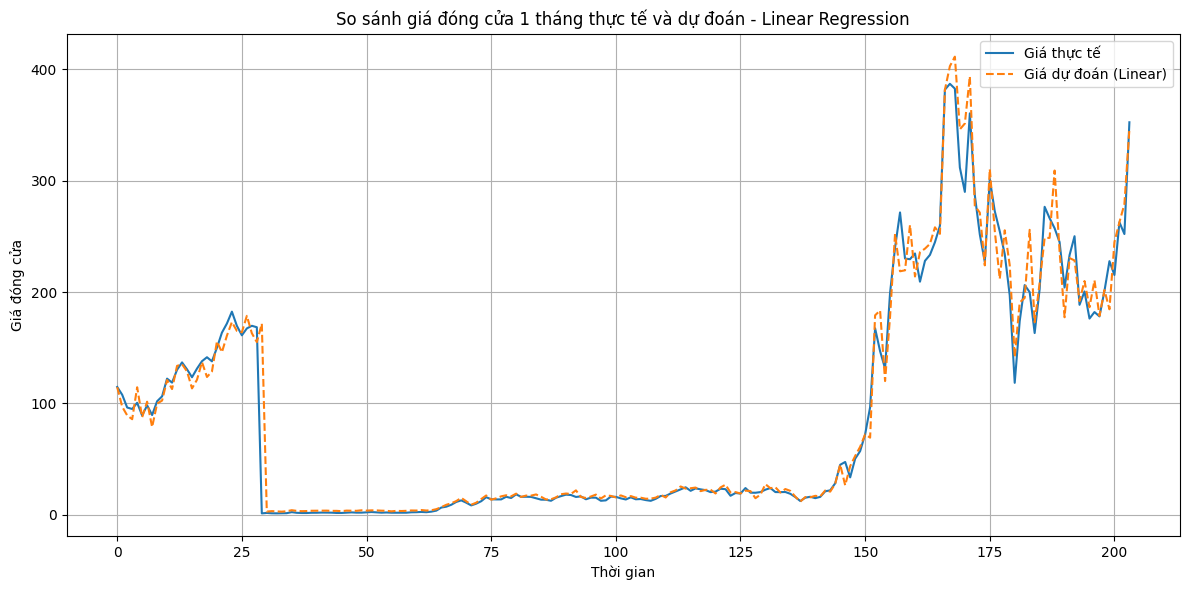

In [ ]:
# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X['month'], y['month'], test_size=0.2, shuffle=False)

# Hu·∫•n luy·ªán m√¥ h√¨nh Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# D·ª± ƒëo√°n
y_pred = lr_model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MAE: {mae:.4f}")
print(f"Linear Regression - RMSE: {rmse:.4f}")
print(f"Linear Regression - R¬≤ Score: {r2:.4f}")

# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh gi√° th·ª±c v√† d·ª± ƒëo√°n
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Gi√° th·ª±c t·∫ø' )
plt.plot(y_pred, label='Gi√° d·ª± ƒëo√°n (Linear)', linestyle='--')
plt.title('So s√°nh gi√° ƒë√≥ng c·ª≠a 1 th√°ng th·ª±c t·∫ø v√† d·ª± ƒëo√°n - Linear Regression')
plt.xlabel('Th·ªùi gian')
plt.ylabel('Gi√° ƒë√≥ng c·ª≠a')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

L∆∞u m√¥ h√¨nh

In [ ]:
import pickle

with open('models.pkl', 'wb') as f:
    pickle.dump(models, f)

In [ ]:
from google.colab import files
files.download('models.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
joblib.dump(models, 'models2.pkl')
from google.colab import files
files.download('models2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(type(models['day']))

<class '__main__.RandomForestRegressor'>


In [ ]:
from google.colab import files

# Ch·∫°y d√≤ng n√†y ‚Üí s·∫Ω hi·ªán n√∫t ch·ªçn file
uploaded = files.upload()


Saving full_code.py to full_code.py


In [ ]:
import os
os.makedirs("models", exist_ok=True)

In [ ]:
!mv full_code.py models/full_code.py

In [ ]:
from models.full_code import RandomForestRegressor, RegressionTreeNode, best_split, mse

# --- Hu·∫•n luy·ªán ri√™ng t·ª´ng m√¥ h√¨nh ƒë·ªÉ d·ª± ƒëo√°n c√°c ch·ªâ s·ªë ---
models = {}
predictions = {}
times = ['day', 'week', 'month']

for time in times:
    model = RandomForestRegressor(n_estimators=10, max_depth=6)
    model.fit(X_train[time].values.tolist(), y_train[time])
    models[time] = model
    predictions[time] = model.predict(X_test[time].values.tolist())

In [ ]:
print(type(models['day']))

<class 'models.full_code.RandomForestRegressor'>


In [ ]:
import joblib
joblib.dump(models, 'models2.pkl')
from google.colab import files
files.download('models2.pkl')

NameError: name 'ridge_regression' is not defined